In [1]:
import os
import cv2
from imutils import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import Normalizer



In [2]:
path=r"F:\Dataset\Image's for project"

Read Data

In [3]:
#labels =set(['A','B','C'])
pathToImage =list(paths.list_images(path))
#print(pathToImage)
data =[]
labels =[]
for images in pathToImage:
    label=images.split(os.path.sep)[-2]
    #print(label)
    image =cv2.imread(images)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
    #plt.figure()


In [4]:
# Total number of images and labels
print('Total number of images',len(data))
print('Total number of labels',len(set(labels)))
print("Labels: ",[X for X in set(labels)])

Total number of images 239
Total number of labels 3
Labels:  ['A', 'C', 'B']


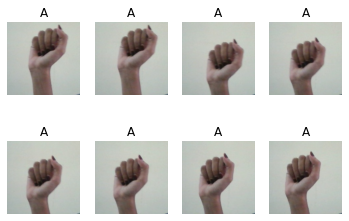

In [5]:
#plt.figure(figsize =(20,20))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(data[i])
    plt.title(labels[i])
    plt.axis('off')

In [51]:
blur_img =[]
hsv_img = []
mask_img =[]
for img in data:
    Gaussain_blur =cv2.GaussianBlur(img,(5,5),0)
    Hsv_img=cv2.cvtColor(Gaussain_blur, cv2.COLOR_BGR2HSV)
    Lower_hsv = np.array([120, 20, 50])
    Upper_hsv = np.array([239,255, 255])
    mask = cv2.inRange(Hsv_img, Lower_hsv, Upper_hsv)  
    res = cv2.bitwise_and(img, img, mask=mask)
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    #mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    #bMask = mask > 0  
    
    # Apply the mask
    #clear = np.zeros_like(img, np.uint8)  # Create empty image
    #clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
    #train_img.append(clear)  # Append image without backgroung
    blur_img.append(Gaussain_blur)
    hsv_img.append(Hsv_img)
    mask_img.append(res)
    

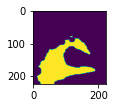

In [7]:
#import cv
blur_img =[]
hsv_img = []
mask_img =[]
for img in data:
    Gaussain_blur =cv2.GaussianBlur(img,(5,5),0)
    Hsv_img=cv2.cvtColor(Gaussain_blur, cv2.COLOR_BGR2HSV)
    Lower_hsv = np.array([120, 20, 50])
    Upper_hsv = np.array([239,255, 255])
    mask = cv2.inRange(Hsv_img, Lower_hsv, Upper_hsv)  
    res = cv2.bitwise_and(img, img, mask=mask)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (16, 16))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    img_erosion = cv2.erode(img, kernel, iterations=10)
    img_dilation = cv2.dilate(img, kernel, iterations=50) 
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    # Create bool mask
    bMask = mask > 0  
    
    # Apply the mask
    clear = np.zeros_like(img, np.uint8)  # Create empty image
    clear[bMask] = img[bMask] 
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        
    blur_img.append(Gaussain_blur)
    hsv_img.append(Hsv_img)
    mask_img.append(res)
    plt.subplot(2, 4, 6); 
    plt.imshow(bMask)
    cv2.imshow('Opening', opening)
    #cv2.imshow('Closing', closing)

In [8]:
len(mask_img[0])

224

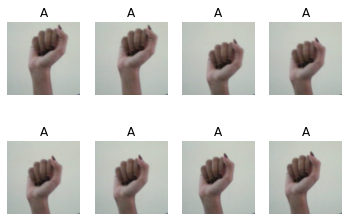

In [9]:
#Gaussian blur image 
#plt.figure(figsize =(20,20))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blur_img[i])
    plt.title(labels[i])
    plt.axis('off')
    
    

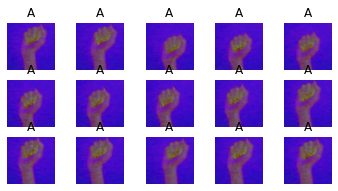

In [10]:
#HSV image 
#plt.figure(figsize =(20,20))
for i in range(15):
    plt.subplot(4, 5, i + 1)
    plt.imshow(hsv_img[i])
    plt.title(labels[i])
    plt.axis('off')

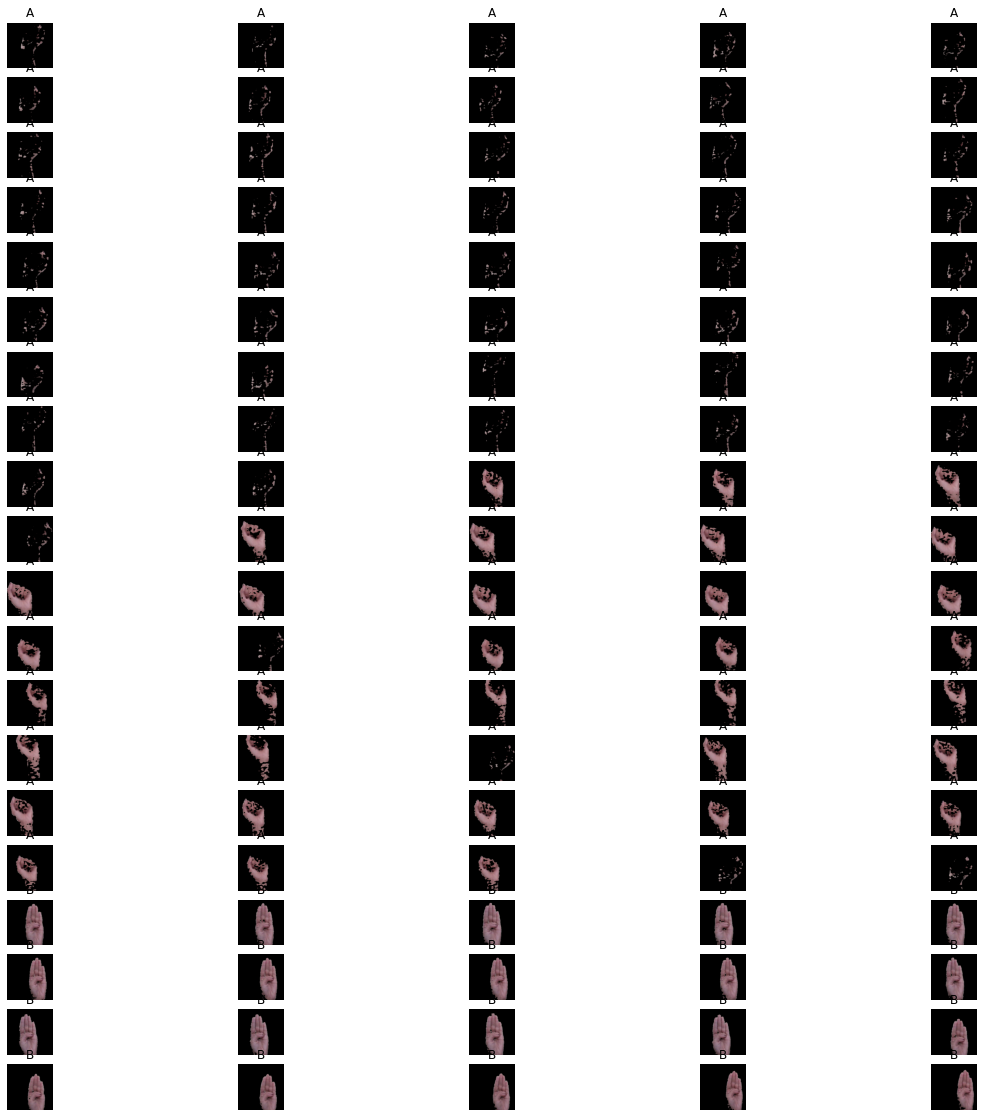

In [11]:
plt.figure(figsize =(20,20))
for i in range(100):
    plt.subplot(20, 5, i + 1)
    plt.imshow(mask_img[i])
    plt.title(labels[i])
    plt.axis('off')

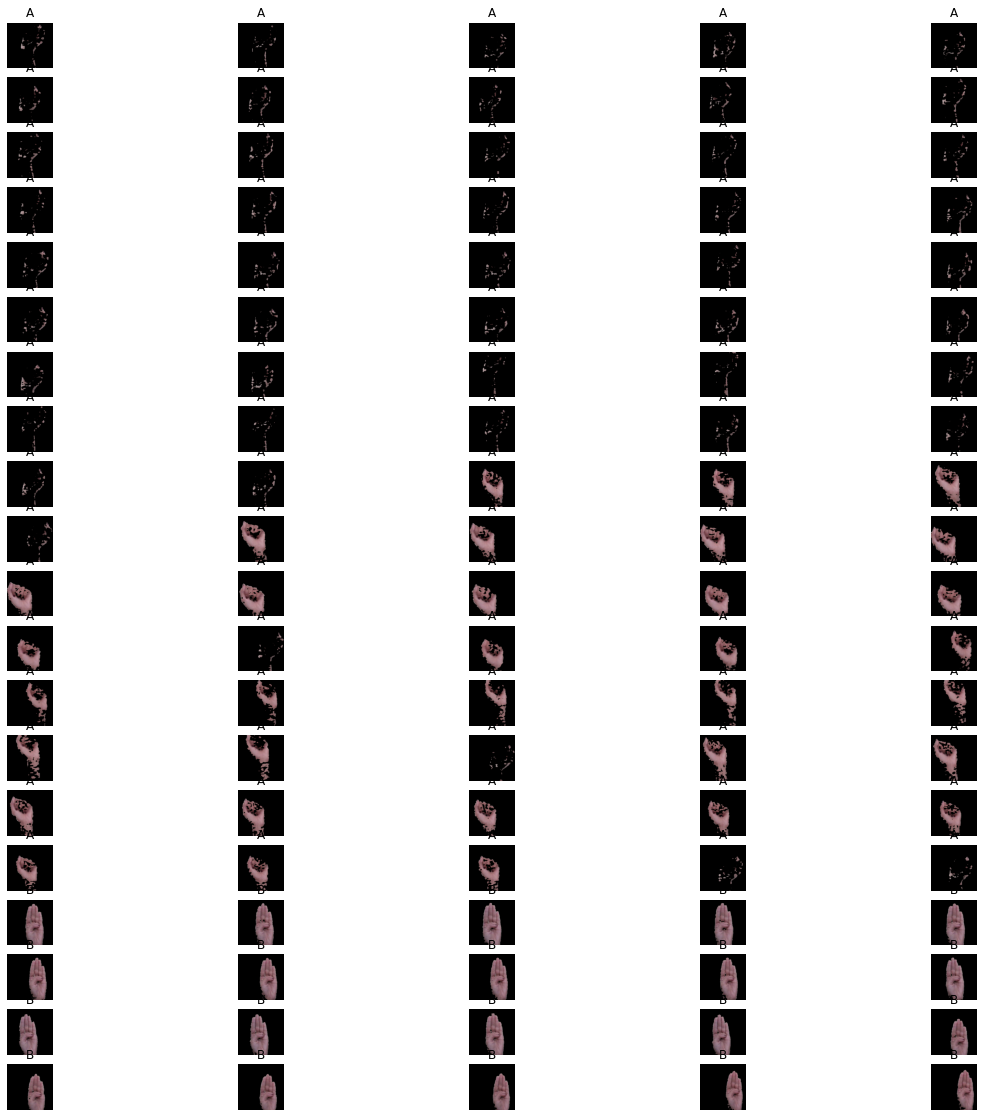

In [12]:
plt.figure(figsize =(20,20))
for i in range(100):
    plt.subplot(20, 5, i + 1)
    plt.imshow(mask_img[i])
    plt.title(labels[i])
    plt.axis('off')

In [13]:
data =np.array(hsv_img)
labels =np.array(labels)


In [14]:
#Splitting Data
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size =0.2,stratify =labels,random_state =42)

In [15]:
#Shape of training and testing 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(191, 224, 224, 3)
(191,)
(48, 224, 224, 3)
(48,)


In [16]:
x_test.shape[0]

48

In [17]:
x_train =x_train/255
x_test = x_test/255

In [18]:
x_test.shape

(48, 224, 224, 3)

In [19]:
lb = preprocessing.LabelBinarizer()
y_train =lb.fit_transform(y_train)
y_test =lb.fit_transform(y_test)

In [20]:
x_test.shape,y_test.shape


((48, 224, 224, 3), (48, 3))

In [21]:
#CNN
# 1st sequential for forward and backoard propogation
model = models.Sequential()
#adding convolution layer
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3),padding ='same'))
#max pooling
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
# Drop_out
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

In [22]:
# now flatten 
model.add(layers.Flatten())
# fully connected neural network
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        3

In [24]:
x_train.shape,y_train.shape


((191, 224, 224, 3), (191, 3))

In [25]:
x_test.shape,y_test.shape


((48, 224, 224, 3), (48, 3))

In [26]:
# complie and train model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.2)

Epoch 1/30
5/5 [==============================] - 9s 2s/step - loss: 2.0523 - accuracy: 0.3618 - val_loss: 1.0914 - val_accuracy: 0.2308
Epoch 2/30
5/5 [==============================] - 6s 1s/step - loss: 1.0885 - accuracy: 0.3553 - val_loss: 1.0949 - val_accuracy: 0.2308
Epoch 3/30
5/5 [==============================] - 7s 1s/step - loss: 1.0172 - accuracy: 0.5066 - val_loss: 0.8864 - val_accuracy: 0.8974
Epoch 4/30
5/5 [==============================] - 6s 1s/step - loss: 0.7515 - accuracy: 0.7434 - val_loss: 0.4844 - val_accuracy: 0.9744
Epoch 5/30
5/5 [==============================] - 6s 1s/step - loss: 0.2322 - accuracy: 0.9868 - val_loss: 0.0567 - val_accuracy: 0.9744
Epoch 6/30
5/5 [==============================] - 6s 1s/step - loss: 0.1263 - accuracy: 0.9474 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 6s 1s/step - loss: 0.0529 - accuracy: 0.9803 - val_loss: 0.0628 - val_accuracy: 0.9744
Epoch 8/30
5/5 [=========================

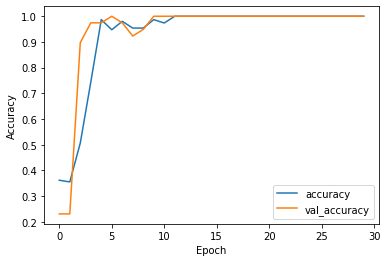

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(validation_ds, verbose=2)

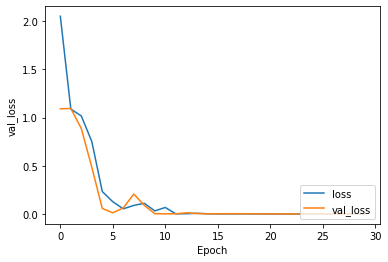

In [28]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [29]:
'''# keras tuner
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(224,224,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model'''

"# keras tuner\ndef build_model(hp):  \n  model = keras.Sequential([\n    keras.layers.Conv2D(\n        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),\n        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),\n        activation='relu',\n        input_shape=(224,224,3)\n    ),\n    keras.layers.Conv2D(\n        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),\n        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),\n        activation='relu'\n    ),\n    keras.layers.Flatten(),\n    keras.layers.Dense(\n        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),\n        activation='relu'\n    ),\n    keras.layers.Dense(10, activation='softmax')\n  ])\n  \n  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),\n              loss='categorical_crossentropy',\n              metrics=['accuracy'])\n  \n  return model"

In [30]:
'''from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters'''

'from keras_tuner import RandomSearch\nfrom keras_tuner.engine.hyperparameters import HyperParameters'

In [31]:
'''tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="sign_language")'''

'tuner_search=RandomSearch(build_model,\n                          objective=\'val_accuracy\',\n                          max_trials=5,directory=\'output\',project_name="sign_language")'

In [32]:
'''tuner_search.search(x_train,train_label,epochs=3,validation_split=0.1)'''


'tuner_search.search(x_train,train_label,epochs=3,validation_split=0.1)'

In [33]:
x_test.shape


(48, 224, 224, 3)

In [34]:
y_test.shape


(48, 3)

In [35]:
score = model.evaluate(x_test, y_test,batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 128ms/step - loss: 1.9608e-04 - accuracy: 1.0000
Test loss: 0.00019607639114838094
Test accuracy: 1.0


In [36]:
y_predict=model.predict(x_test)
print(y_predict)
y_result  =np.argmax(y_predict,axis =1)
print(y_result)
y_test=np.argmax(y_test,axis =1)

[[9.99998689e-01 1.32908156e-06 6.17151885e-11]
 [9.99999762e-01 2.20540400e-07 1.46426968e-12]
 [9.99984026e-01 1.44879059e-05 1.46311766e-06]
 [5.13394434e-06 9.99994874e-01 3.67848655e-13]
 [9.99998808e-01 1.22954077e-06 5.37910558e-12]
 [1.21064022e-05 1.04127096e-09 9.99987841e-01]
 [1.24025054e-03 9.98177043e-08 9.98759627e-01]
 [4.38394466e-07 6.19717824e-08 9.99999523e-01]
 [8.88949489e-06 9.99991059e-01 3.29738190e-12]
 [2.20663733e-05 9.99977946e-01 1.24959956e-11]
 [9.42400675e-06 9.99990582e-01 1.47869808e-13]
 [5.16378786e-04 3.90084374e-08 9.99483585e-01]
 [5.11794906e-06 9.99994874e-01 4.46256573e-12]
 [9.99876142e-01 5.21112042e-06 1.18566102e-04]
 [1.11263807e-06 3.21301599e-08 9.99998808e-01]
 [9.99999404e-01 5.60480828e-07 3.72687645e-11]
 [8.66499031e-05 9.99913335e-01 1.04041120e-09]
 [7.45171837e-06 2.87911517e-09 9.99992490e-01]
 [9.99941707e-01 4.97097462e-05 8.55702092e-06]
 [3.29346047e-04 1.51076929e-08 9.99670625e-01]
 [1.57088180e-05 9.99984264e-01 1.571787

In [37]:
print(y_result)


[0 0 0 1 0 2 2 2 1 1 1 2 1 0 2 0 1 2 0 2 1 0 1 2 0 0 0 1 1 1 2 2 2 2 1 2 1
 0 2 2 2 0 1 0 0 1 1 0]


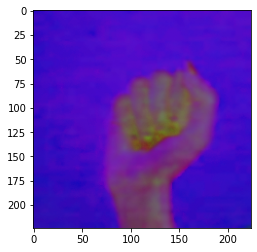

In [38]:
plt.imshow(x_test[0])


accuracy_score 1.0

confusion_matrix               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        16

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



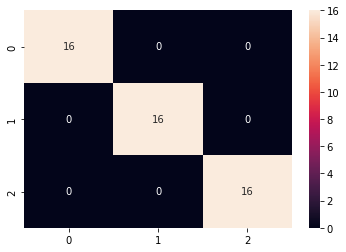

In [39]:
from sklearn.metrics import classification_report as cr,accuracy_score,confusion_matrix
cm =confusion_matrix(y_test,y_result)
sns.heatmap(cm,annot =True)
print("accuracy_score",accuracy_score(y_test,y_result))
print()
print('confusion_matrix',cr(y_test,y_result))

In [40]:
y_test


array([0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0,
       1, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [41]:
path_a=r'F:\Dataset\project dataset\B\22.jpg'


[[[186 198 198]
  [187 199 199]
  [186 200 199]
  ...
  [201 219 230]
  [199 219 230]
  [199 219 230]]

 [[187 199 199]
  [188 200 200]
  [187 201 200]
  ...
  [201 219 230]
  [199 219 230]
  [198 218 229]]

 [[189 201 201]
  [190 202 202]
  [188 202 201]
  ...
  [201 220 228]
  [201 220 228]
  [201 220 228]]

 ...

 [[196 192 181]
  [196 192 181]
  [195 192 178]
  ...
  [ 46  44  44]
  [ 46  41  42]
  [ 34  29  30]]

 [[196 192 181]
  [197 193 182]
  [199 193 180]
  ...
  [ 44  39  40]
  [ 48  43  45]
  [ 38  33  35]]

 [[196 192 181]
  [197 193 182]
  [200 194 181]
  ...
  [ 43  38  39]
  [ 50  45  47]
  [ 40  35  37]]]
[[[ 88  16 201]
  [ 90  17 200]
  [ 90  18 200]
  ...
  [101  31 229]
  [100  32 229]
  [100  32 229]]

 [[ 88  16 201]
  [ 90  15 200]
  [ 90  18 200]
  ...
  [100  31 229]
  [ 99  32 229]
  [ 99  32 229]]

 [[ 90  16 201]
  [ 90  15 200]
  [ 90  17 200]
  ...
  [100  31 229]
  [100  31 229]
  [100  31 229]]

 ...

 [[ 23  21 197]
  [ 23  21 197]
  [ 23  22 197]
  ..

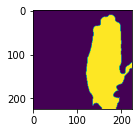

In [42]:
import cv2
kernel = np.ones((5, 5), np.uint8)
#skimage.morphology.dilstion
kernal= np.ones((5,5),np.uint8)
img_1 =cv2.imread(path_a)
print(img_1)
img_2= cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)
img_2=cv2.resize(img_2,(224,224))
Gaussain_blur =cv2.GaussianBlur(img_2,(5,5) ,sigmaX=34, sigmaY=36)
Hsv_img=cv2.cvtColor(Gaussain_blur, cv2.COLOR_BGR2HSV)
#Hsv_img =Hsv_img/225
Lower_hsv = np.array([120, 20, 50])
Upper_hsv = np.array([239,255, 255])
mask = cv2.inRange(Hsv_img, Lower_hsv, Upper_hsv)  
res = cv2.bitwise_and(img_1, img_1, mask=mask)
new_image = tf.expand_dims(res,0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)    
    # Create bool mask
bMask = mask > 0  
    
    # Apply the mask
clear = np.zeros_like(img, np.uint8)  # Create empty image
clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
    
#clearTrainImg.append(clear)  # Append image without backgroung
    
#clearTrainImg.append(clear)
print(Hsv_img)
print(new_image)
plt.imshow(res)
plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
#plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
#getEx = False


In [43]:
blur_img=[]
for img in data:
    GaussianBlur=cv2.GaussianBlur(img,(5,5),sigmaX=34, sigmaY=36)
    blur_img.append(GaussianBlur)

In [44]:
blur_img=[]
for img in data:
    GaussianBlur=cv2.GaussianBlur(img,(5,5),0)
    blur_img.append(GaussianBlur)

[[[121 141 146]
  [123 143 148]
  [124 144 149]
  ...
  [153 168 171]
  [154 169 172]
  [154 169 172]]

 [[121 141 146]
  [122 142 147]
  [124 144 149]
  ...
  [154 169 172]
  [154 169 172]
  [154 169 172]]

 [[121 141 146]
  [122 142 147]
  [123 143 148]
  ...
  [155 170 173]
  [155 170 173]
  [155 170 173]]

 ...

 [[123 130 139]
  [107 114 123]
  [ 90  97 106]
  ...
  [167 165 164]
  [168 166 165]
  [168 166 165]]

 [[114 120 131]
  [ 93  99 110]
  [ 77  83  94]
  ...
  [167 165 164]
  [167 165 164]
  [167 165 164]]

 [[103 109 120]
  [ 81  87  98]
  [ 67  73  84]
  ...
  [166 164 163]
  [167 165 164]
  [167 165 164]]]
[[[0.64888889 0.62666667 0.53777778]
  [0.65777778 0.63555556 0.54666667]
  [0.66222222 0.64       0.55111111]
  ...
  [0.76       0.74666667 0.68      ]
  [0.76444444 0.75111111 0.68444444]
  [0.76444444 0.75111111 0.68444444]]

 [[0.64888889 0.62666667 0.53777778]
  [0.65333333 0.63111111 0.54222222]
  [0.66222222 0.64       0.55111111]
  ...
  [0.76444444 0.7511111

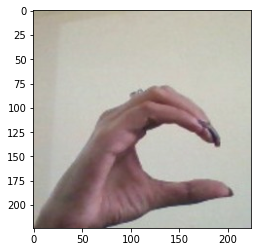

In [50]:
path_c =r'F:\Dataset\Example\C\7.jpg'
img_c =cv2.imread(path_c)
print(img_c)
plt.imshow(img_c)
img_C= cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)
img_C=cv2.resize(img_C,(224,224))
img_C =img_C/225
new_image_c= tf.expand_dims(img_C,0)
print(img_C)
print(new_image_c)
plt.imshow(img_C)

In [46]:
pred_img=model.predict(np.array(new_image_c))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

[[1.9699637e-18 5.7539120e-26 1.0000000e+00]]


array([2], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[192 205 203]
  [190 203 201]
  [190 203 201]
  ...
  [185 196 194]
  [185 196 194]
  [185 196 194]]

 [[192 205 203]
  [191 204 202]
  [190 203 201]
  ...
  [185 196 194]
  [185 196 194]
  [185 196 194]]

 [[194 205 203]
  [193 204 202]
  [193 204 202]
  ...
  [186 197 195]
  [188 196 195]
  [188 196 195]]

 ...

 [[238 229 225]
  [237 228 224]
  [237 228 224]
  ...
  [ 40  33  30]
  [ 35  26  22]
  [ 36  27  23]]

 [[238 229 225]
  [237 228 224]
  [236 227 223]
  ...
  [ 42  33  29]
  [ 39  28  24]
  [ 39  28  24]]

 [[238 229 225]
  [237 228 224]
  [236 227 223]
  ...
  [ 41  32  28]
  [ 41  30  26]
  [ 41  30  26]]]


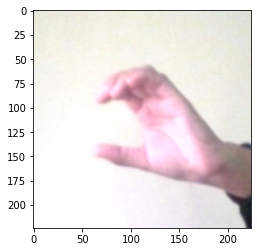

In [47]:
path_c =r'F:\Dataset\project dataset\C\1.jpg'
img_c =cv2.imread(path_c)
print(img_c)
#plt.imshow(img_c)
img_C= cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)
img_C=cv2.resize(img_C,(224,224))
img_C =img_C/225
Gaussain_blur =cv2.GaussianBlur(img,(5,5),0)
Hsv_img=cv2.cvtColor(Gaussain_blur, cv2.COLOR_BGR2HSV)
Lower_hsv = np.array([120, 20, 50])
Upper_hsv = np.array([239,255, 255])
mask = cv2.inRange(Hsv_img, Lower_hsv, Upper_hsv)  
res = cv2.bitwise_and(img, img, mask=mask)
res=res/255
clear = np.zeros_like(img, np.uint8)  
clear[bMask] = img[bMask]  
new_image_c= tf.expand_dims(img_C,0)
#print(img_C)
#print(new_image_c)
plt.imshow(img_C)
mask_img.append(res)

In [48]:
pred_img=model.predict(np.array(new_image_c))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

[[4.7168577e-24 4.5017660e-32 1.0000000e+00]]


array([2], dtype=int64)

In [49]:
from keras.utils import np_utils
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(train_img[0])
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(trainLabel[0])

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
trainLabel[0].value_counts().plot(kind='bar')

NameError: name 'train_img' is not defined